This notebook is the building block behind the deliverable "INCM_ExploratoryDataAnalysis". When reading through the notebook, please keep in mind the results of the analysis are described there rather than here.

In [72]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
from decimal import Decimal
from re import sub
import matplotlib.pyplot as plt
import pdfplumber

In [4]:
df = pd.read_csv('../../data/curation_data/EDA_TABELA_CSV.csv', encoding='utf-8')

df[df['referencia'].map(lambda d: len(d)) > 0]


df

alinea_id                                              title article  \
0            0                     MANUTENÇÃO DE ANTERIOR DIREITO       2   
1            1                                  MODO DE INSCRIÇÃO       3   
2            2                                  MODO DE INSCRIÇÃO       3   
3            3   IDADE MÁXIMA E TOTALIZAÇÃO DE PERÍODOS CONTRI...       4   
4            4   IDADE MÁXIMA E TOTALIZAÇÃO DE PERÍODOS CONTRI...       4   
..         ...                                                ...     ...   
308        308                                LEGISLAÇÃO REVOGADA     141   
309        309                                LEGISLAÇÃO REVOGADA     141   
310        310                           MODIFICAÇÕES AO ESTATUTO     142   
311        311                           MODIFICAÇÕES AO ESTATUTO     142   
312        312                      RESOLUÇÃO GENÉRICA DE DÚVIDAS     143   

     alinea                      revisto      validado  \
0         1   Helder Santos (na íntegra)   Bruno Vidal   
1         1                                Bruno Vidal   
2         2                                Bruno Vidal   
3         1                                Bruno Vidal   
4         2                                Bruno Vidal   
..      ...                          ...           ...   
308       1                                Bruno Vidal   
309       2                                Bruno Vidal   
310       1                                Bruno Vidal   
311       2                                Bruno Vidal   
312       1                                Bruno Vidal   

                                       law_description  \
0    O disposto no artigo 1.º não prejudica o direi...   
1    1. A inscrição efetua-se mediante boletim, em ...   
2    2. Se o subscritor passar a exercer funções em...   
3    1. A idade máxima para a inscrição na Caixa se...   
4    2. Os períodos contributivos cumpridos no âmbi...   
..                                                 ...   
308  1. Ficam revogados, a partir da data da entrad...   
309  2. Mantêm-se em vigor os preceitos especiais s...   
310  1. As disposições que de futuro se publicarem ...   
311  2. As taxas mencionadas no n.º 1 do artigo 93....   
312  Compete ao Ministro das Finanças, ouvida a adm...   

                                                topico  \
0                                        ['Inscrição']   
1                                        ['Inscrição']   
2                                        ['Inscrição']   
3                                        ['Inscrição']   
4                                        ['Inscrição']   
..                                                 ...   
308                            ['Legislação Revogada']   
309  ['Preceitos Especiais', 'Disposições Especiais...   
310                    ['Atualização', 'Consolidação']   
311                                          ['Taxas']   
312                      ['Esclarecimento de Dúvidas']   

                                referencia  \
0                                   ['1.']   
1                                     ['']   
2                                    [' ']   
3                                    [' ']   
4                                    [' ']   
..                                     ...   
308                                   ['']   
309                                   ['']   
310                                   ['']   
311  ['93.1', ' 95.2', ' 104.3', ' 107.2']   
312                                   ['']   

                                       referencia_incm article_alinea  
0                                                  NaN            2.1  
1     PORTARIA N.º 165/95, DE 2 DE MARÇO (SEM ALTER...            3.1  
2     PORTARIA N.º 165/95, DE 2 DE MARÇO (SEM ALTER...            3.2  
3      O DECRETO-LEI N.º 6/2019 ALTEROU A REDAÇÃO D...            4.1  
4     O DECRETO-LEI N.º 6/2019 ALTEROU A REDAÇÃO DO...            4.2  
..  

In [5]:
print ('Total number of alineas:' ,len(df.article))
print ('Mean number that an article appears:' ,df['article'].value_counts().mean())

# How many times each article appears in the collumn, descending order
df['article'].value_counts()

Total number of alineas: 313
Mean number that an article appears: 2.484126984126984


 64     10
 108     8
 79      7
 78      6
 16      6
        ..
 65      1
 110     1
 140     1
 63A     1
 116     1
Name: article, Length: 126, dtype: int64

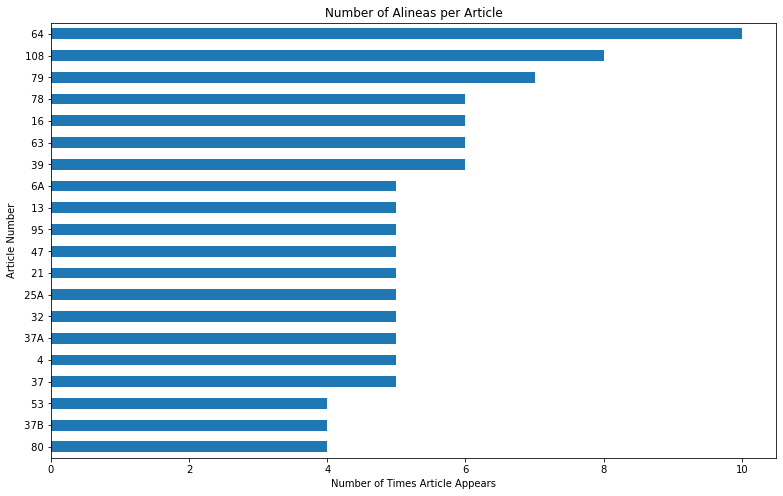

In [6]:
plt.figure(figsize=(13,8))

df['article'].value_counts(ascending=False)[:20].sort_values().plot(kind='barh')
plt.title('Number of Alineas per Article')
plt.xlabel('Number of Times Article Appears')
plt.ylabel('Article Number')

# plt.savefig('Num_alineas_per_article.png') # activate to save the figure

In [8]:
categories = ['article', 'alinea', 'count_characters_alinea', 'count_words_alinea']

# Create a new dataframe
eda_df = pd.DataFrame(columns=categories)

# Populate the columns with article, alinea and respective length 
eda_df['article'] = df['article']
eda_df['alinea'] = df['alinea']
eda_df['count_characters_alinea'] = df['law_description'].str.len()
eda_df['count_words_alinea'] = df['law_description'].str.split().str.len()


print('Mean of Characters per Alinea:', eda_df['count_characters_alinea'].mean())
print('Mean of Words per Alinea:', eda_df['count_words_alinea'].mean())

eda_df

Mean of Characters per Alinea: 254.99041533546327
Mean of Words per Alinea: 41.12140575079872


article  alinea  count_characters_alinea  count_words_alinea
0         2       1                      132                  21
1         3       1                      198                  30
2         3       2                      252                  38
3         4       1                      221                  41
4         4       2                      408                  61
..      ...     ...                      ...                 ...
308     141       1                     2011                 385
309     141       2                      345                  52
310     142       1                      253                  36
311     142       2                      192                  38
312     143       1                      269                  38

[313 rows x 4 columns]

In [10]:
df['referencia'].apply(eval).tolist() # --> Se não estiver a funcionar, comentar esta linha 
referencia_list = df['referencia']

# Delete references that are Null
referencia_list = [item for item in referencia_list if (item != [''])]
referencia_list = [item for item in referencia_list if (item != [' '])]

# Get number of references
referencia_number = len(referencia_list)

print('Total number of alineas:',referencia_number)
print('Average number of references per alinea:', referencia_number / len(df['article']))

Total number of alineas: 313
Average number of references per alinea: 1.0


In [11]:
df['referencia'] = df['referencia'].apply(eval).tolist()

In [12]:
ref_list = []
a=[]

for sublist in df['referencia']:
    for element in sublist:
        element=element.strip()
        if len(element)<=5:
            if element != '' or element != ' ' :
                ref_list.append(element)

        
            
dic = {x:ref_list.count(x) for x in ref_list}

# Filter out the references that are text
ref_counter = {k: v for k, v in dic.items() if (len(k) <= 10)}
ref_counter = {k: v for k, v in dic.items() if ("ª" not in k)}
ref_counter = {k: v for k, v in dic.items() if ("º" not in k)}
ref_counter = dict(sorted(ref_counter.items(), key=lambda item: item[1], reverse=True))
del ref_counter['']

# keys = references, vals = number of times they appear
keys = ref_counter.keys()
vals = ref_counter.values()


plt.figure(figsize=(13,8))
plt.bar(keys, vals)
plt.xlim(-0.6,18.6)
plt.ylabel ('Number of times article is referenced')
plt.xlabel ('Reference')
plt.title('Number of Times Article appears as reference')
plt.xlabel('Reference Number')
plt.ylabel('Number of Times Article appears as reference')
#plt.figure(figsize=(100,760))

# plt.savefig('Num_times_references.png') # activate to save the figure

Text(0, 0.5, 'Number of Times Article appears as reference')

In [13]:
# Count how many topics there are
df['topico'] = df['topico'].apply(eval).tolist()
 

lista_topicos = []

for sublist in df['topico']:
    for element in sublist:
        if ',' in element:
            lista_topicos.append(element.split(','))
        else:
            lista_topicos.append(element)

lista_topicos = [x.lower() for x in lista_topicos]

lista_topicos = sorted(set(lista_topicos))

lista_topicos_unicos = [topico.capitalize() for topico in lista_topicos]

print('Nr of topics:', len(lista_topicos_unicos))

Nr of topics: 137


In [14]:
lista_len_topicos = []


# Count how many topics there are
for i in range(0, df['topico'].shape[0]):
    if df['topico'][i][0] == '':
        lista_len_topicos.append(0)
    else:
        lista_len_topicos.append(len(df['topico'][i]))    

a = []
for i in lista_len_topicos:
    if i == 0:
        a.append(i)

# Count how many alineas without topics there are
sem_topico = len(a)    

print("Articles without topic:", sem_topico,'\n', a)
    
print('\nHow many topics appear in total per alinea:', len(lista_len_topicos),'\nList of how many topics per alinea:', lista_len_topicos)

Articles without topic: 29 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

How many topics appear in total per alinea: 313 
List of how many topics per alinea: [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 3, 0, 0, 0, 3, 1, 1, 2, 1, 0, 1, 1, 1, 3, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 0, 2, 2, 1, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 3, 2, 1, 1, 2, 4, 1, 0, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 3, 0, 0, 2, 2, 0, 0, 1, 1, 1, 3, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 4, 3, 4, 1, 2, 2, 2, 5, 1, 3, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 3, 2, 2, 1, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 4, 4, 1, 2, 4, 2, 1, 1, 2, 3, 1, 1, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 2, 2, 1, 1, 1, 1, 3, 3, 2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 3, 3, 3, 3, 2, 2, 3, 3, 2, 1, 1, 1, 5, 2, 1, 2, 3, 1, 1, 1, 1, 1, 3, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 2, 2, 3

In [19]:
print('Max topics per article: {0}'. format(max(lista_len_topicos)),
     '\nMin topics per article: {0}'. format(min(lista_len_topicos)),
     '\nMean topics per article: {0}'. format(round(np.mean(lista_len_topicos),2)),
     '\nNumber of articles without topic: {0}'. format(sem_topico))

Max topics per article: 5 
Min topics per article: 0 
Mean topics per article: 1.56 
Number of articles without topic: 29


Text(0, 0.5, 'Distribution')

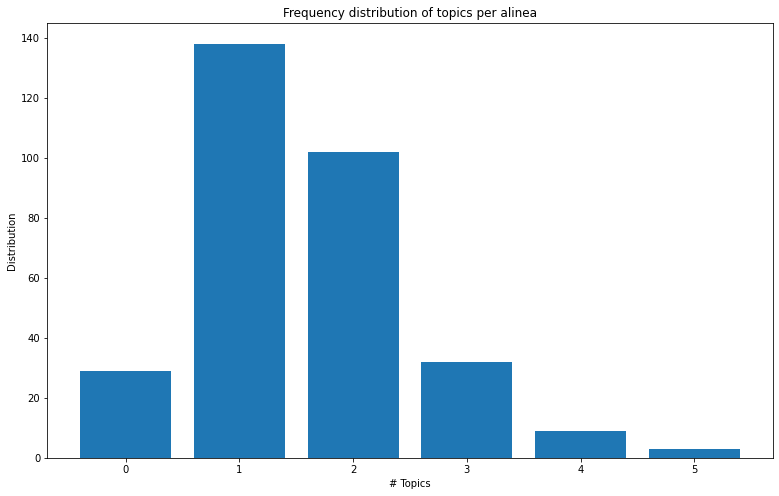

In [20]:
# Histogram 

count_dic = {x:lista_len_topicos.count(x) for x in lista_len_topicos}

keys = count_dic.keys()
values = count_dic.values()

plt.figure(figsize=(13,8))
plt.bar(keys, values)
plt.title('Frequency distribution of topics per alinea')
plt.xlabel('# Topics')
plt.ylabel('Distribution')

# plt.savefig('Frequency_distribution_topics.png') # activate to save the figure